In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pycircstat2 import Circular, load_data

# Statistical analysis of circular data (Fisher, 1993)

### Figure 2.1

In [2]:
from pycircstat2.utils import time2float

d_fisher_b1 = load_data('B1', source='fisher')['time'].values
c_fisher_b1 = Circular(time2float(d_fisher_b1), unit='hour')

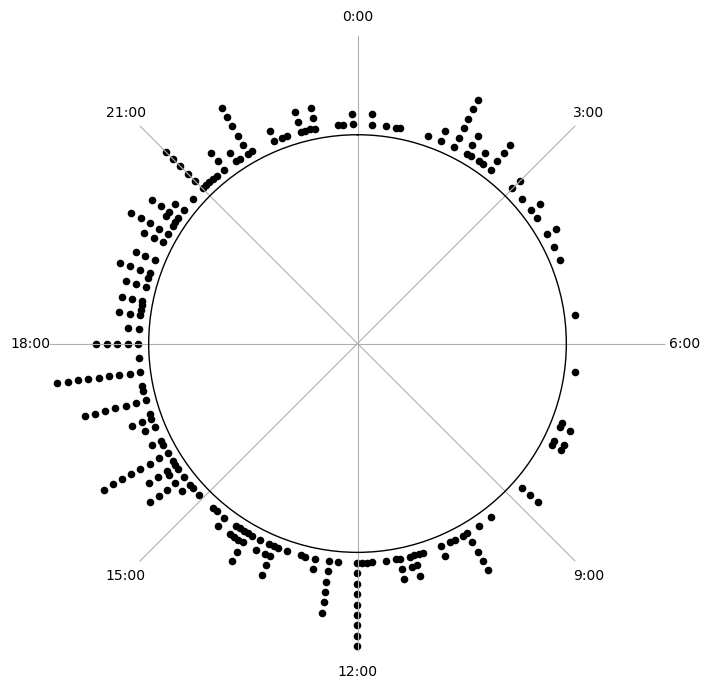

In [3]:
c_fisher_b1.plot(
    plot_rose=False, plot_mean=False, plot_median=False, plot_density=False,
    marker_size=20) 

### Figure 2.2

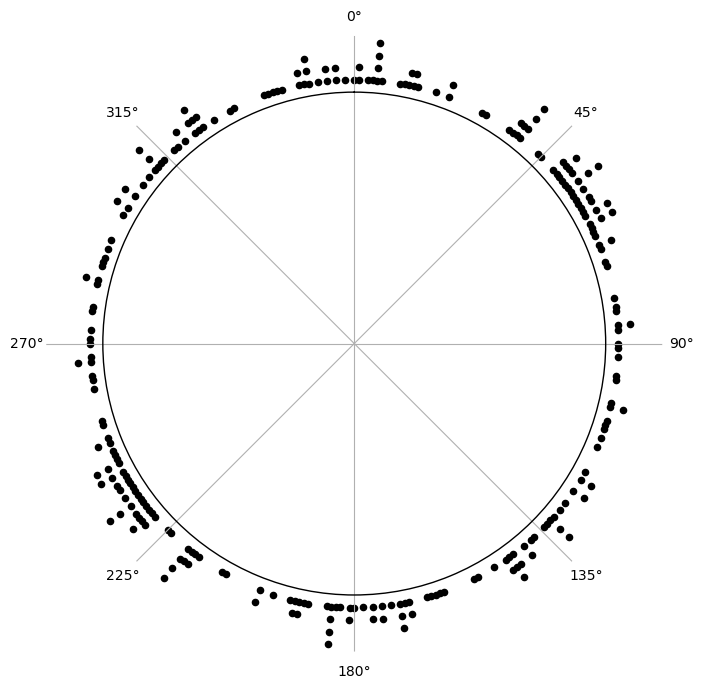

In [4]:
d_fisher_b2 = load_data('B2', source='fisher')['θ'].values
d_fisher_b2_double = np.hstack([d_fisher_b2, d_fisher_b2 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b2 = Circular(d_fisher_b2_double, unit='degree')

c_fisher_b2.plot(
    plot_rose=False, plot_mean=False, plot_median=False, plot_density=False,
    marker_size=20) 

### Figure 2.9

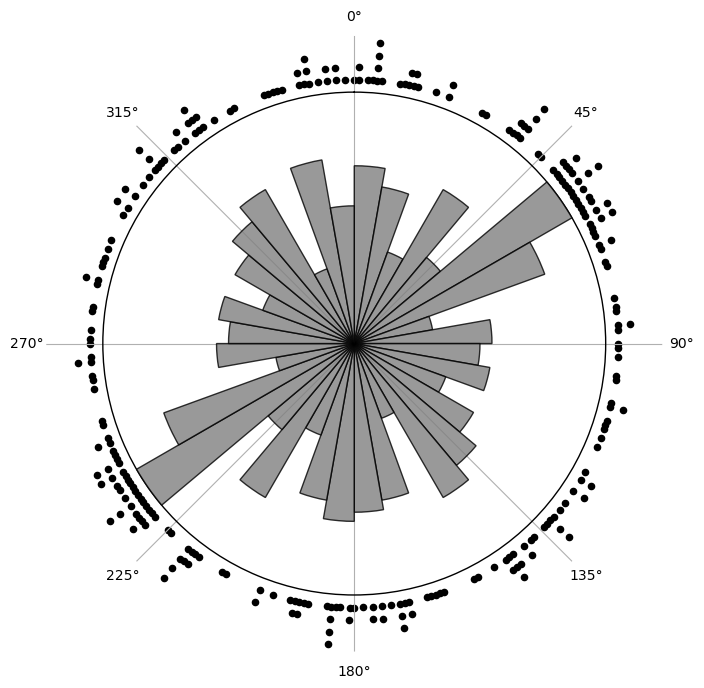

In [5]:
d_fisher_b2 = load_data('B2', source='fisher')['θ'].values
d_fisher_b2_double = np.hstack([d_fisher_b2, d_fisher_b2 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b2 = Circular(d_fisher_b2_double, unit='degree')

c_fisher_b2.plot(
    plot_rose=True, bins=36,
    plot_mean=False, plot_median=False, plot_density=False,
    marker_size=20) 

### Figure 2.14

In [6]:
d_fisher_b1 = load_data('B1', source='fisher')['time'].values
c_fisher_b1 = Circular(time2float(d_fisher_b1), unit='hour')

In [7]:
from pycircstat2.descriptive import compute_smooth_params

h0 = compute_smooth_params(c_fisher_b1.r, c_fisher_b1.n)
h0

1.0587043511866296

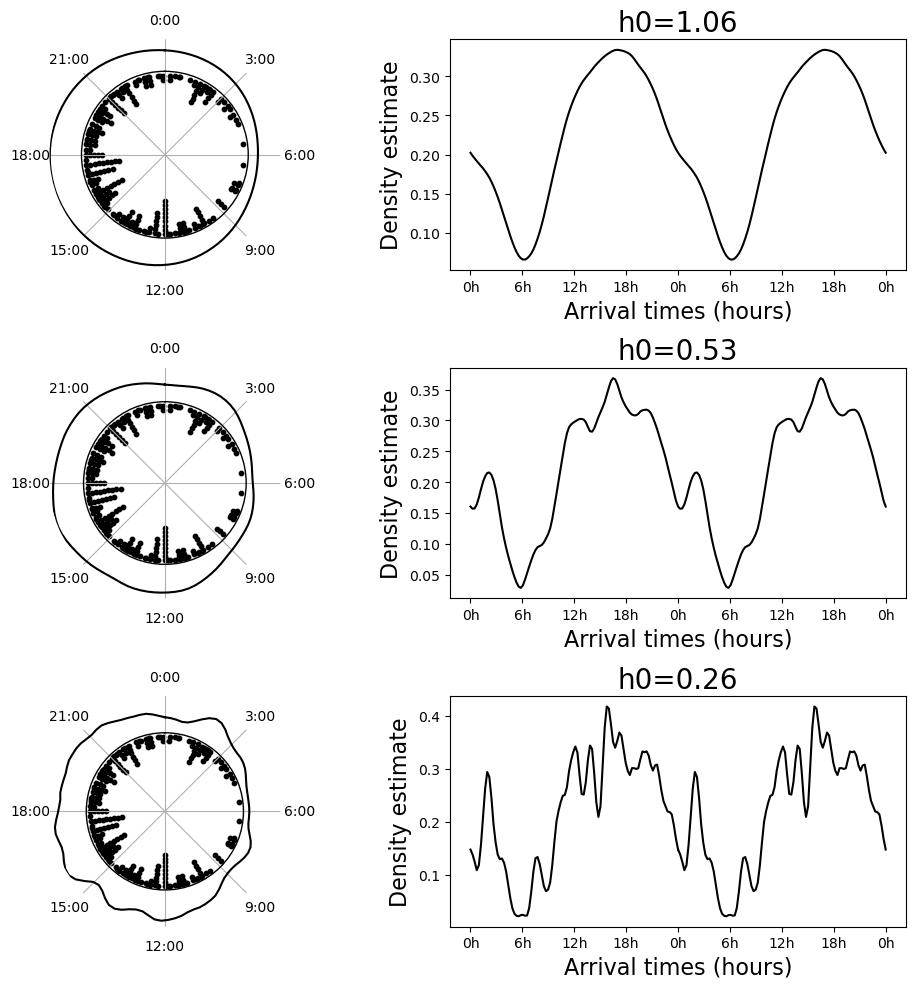

In [8]:
from matplotlib import ticker

fig = plt.figure(figsize=(10, 10))

# Fig A: h0 = 1.06
ax00 = fig.add_subplot(321, polar=True)
c_fisher_b1.plot(
    outward=False,
    plot_rose=False, plot_mean=False, plot_median=False,
    kwargs_density={'method': 'nonparametric', 'h0': h0}, 
    ax=ax00) 

ax01 = fig.add_subplot(322)
ax01.plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]), 
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color='black'
    )
    

# Fig B: h0 = 0.53
ax10 = fig.add_subplot(323, polar=True)
c_fisher_b1.plot(
    outward=False,
    plot_rose=False, plot_mean=False, plot_median=False,
    kwargs_density={'method': 'nonparametric', 'h0': 0.5 * h0}, 
    ax=ax10) 

ax11 = fig.add_subplot(324)
ax11.plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]), 
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color='black'
    )
    

# Fig C h0 = 0.26
ax20 = fig.add_subplot(325, polar=True)
c_fisher_b1.plot(
    outward=False,
    plot_rose=False, plot_mean=False, plot_median=False,
    kwargs_density={'method': 'nonparametric', 'h0': 0.25 * h0}, 
    ax=ax20) 

ax21 = fig.add_subplot(326)
ax21.plot(
    np.hstack([c_fisher_b1.density_x, c_fisher_b1.density_x + 2 * np.pi]), 
    np.repeat(c_fisher_b1.density_f[:, None], 2, axis=-1).T.flatten(),
    color='black'
    )
    

h0s = [h0, 0.5 * h0, 0.25 * h0]
position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
position_major = np.hstack([position_major, position_major + 2 * np.pi, 4 * np.pi])
labels = [f"{i}h" for i in np.arange(0, c_fisher_b1.n_intervals, 6)]
labels = np.hstack([labels,labels, labels[0]])
for i, ax in enumerate([ax01, ax11, ax21]):
    ax.xaxis.set_major_locator(ticker.FixedLocator(position_major))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    ax.set_xlabel('Arrival times (hours)', fontsize=16)
    ax.set_ylabel('Density estimate', fontsize=16)
    ax.set_title(f'h0={h0s[i]:.2f}', fontsize=20)

fig.tight_layout()



### Figure 4.5

In [9]:
d_fisher_b5 = load_data('B5', source='fisher')['θ'].values
d_fisher_b5_double = np.hstack([d_fisher_b5, d_fisher_b5 + 180])
# This is an example of an axial data set, which only contains one direction;
# To replicate Fig 2.2, you need to double the data;
c_fisher_b5 = Circular(d_fisher_b5_double, unit='degree')

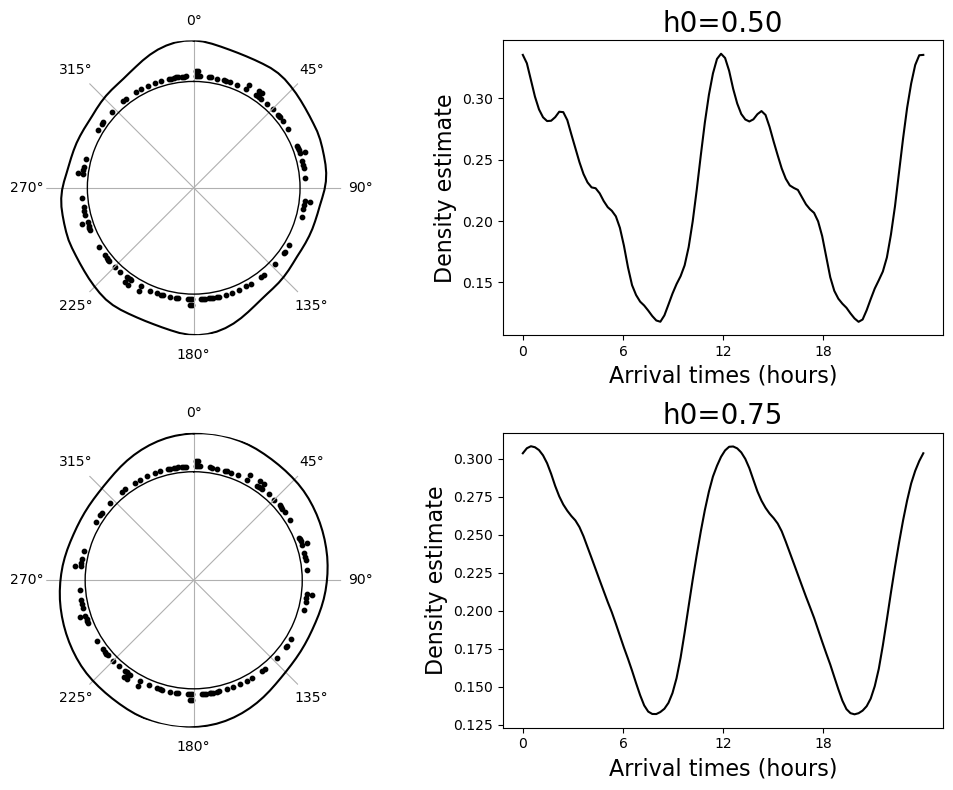

In [10]:
from matplotlib import ticker

fig = plt.figure(figsize=(10, 8))

# Fig A: h0 = 1.06
ax00 = fig.add_subplot(221, polar=True)
c_fisher_b5.plot(
    outward=True,
    plot_rose=False, plot_mean=False, plot_median=False,
    kwargs_density={'method': 'nonparametric', 'h0': 0.5}, 
    ax=ax00) 

ax01 = fig.add_subplot(222)
ax01.plot(
    c_fisher_b5.density_x,
    c_fisher_b5.density_f,
    color='black'
    )
    

# Fig B: h0 = 0.53
ax10 = fig.add_subplot(223, polar=True)
c_fisher_b5.plot(
    outward=True,
    plot_rose=False, plot_mean=False, plot_median=False,
    kwargs_density={'method': 'nonparametric', 'h0': 0.75}, 
    ax=ax10) 

ax11 = fig.add_subplot(224)
ax11.plot(
    c_fisher_b5.density_x,
    c_fisher_b5.density_f,
    color='black'
    )
    

h0s = [0.5, 0.75]
position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
# position_major = np.hstack([position_major, position_major + 2 * np.pi, 4 * np.pi])
labels = np.arange(0, c_fisher_b1.n_intervals, 6)
# labels = np.hstack([labels,labels, labels[0]])
for i, ax in enumerate([ax01, ax11]):
    ax.xaxis.set_major_locator(ticker.FixedLocator(position_major))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(labels))
    ax.set_xlabel('Arrival times (hours)', fontsize=16)
    ax.set_ylabel('Density estimate', fontsize=16)
    ax.set_title(f'h0={h0s[i]:.2f}', fontsize=20)

fig.tight_layout()



### Figure 4.3 and 4.6

In [11]:
d_fisher_b6 = load_data('B6', source='fisher')
d_fisher_b6_s2 = d_fisher_b6[d_fisher_b6['set'] == 2]['θ'].values
c_fisher_b6 = Circular(d_fisher_b6_s2, unit='degree')

Text(0, 0.5, 'Symmetrized quantile')

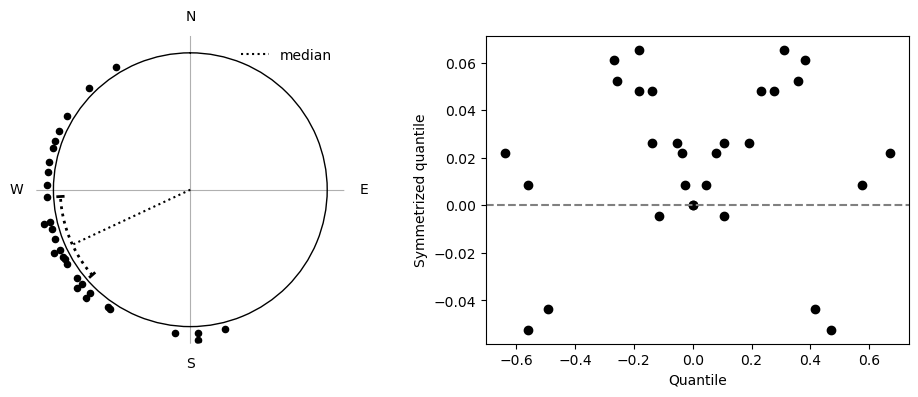

In [12]:
fig = plt.figure(figsize=(12, 4))
ax0 = fig.add_subplot(121, polar=True)
c_fisher_b6.plot(
    plot_rose=False, plot_mean=False, plot_median=True, plot_density=False,
    marker_size=20,
    ax=ax0) 

position_major = np.arange(0, 2 * np.pi, 2 * np.pi / 4)
labels = ['N', 'E', 'S', 'W']
ax0.xaxis.set_major_locator(ticker.FixedLocator(position_major))
ax0.xaxis.set_major_formatter(ticker.FixedFormatter(labels))

ax1 = fig.add_subplot(122, polar=False)

z = np.sort(0.5 * (c_fisher_b6.alpha - c_fisher_b6.median))
ax1.scatter(np.sin(z), np.sin(0.5 * (z + z[::-1])), color='black')
ax1.axhline(0, ls='--', color='gray')
ax1.set_xlabel('Quantile')
ax1.set_ylabel('Symmetrized quantile')

### Figure 4.7

In [13]:
d_fisher_b5 = load_data('B5', source='fisher')['θ'].values
c_fisher_b5 = Circular(d_fisher_b5, unit='degree')

In [14]:
n = c_fisher_b5.n
γ = c_fisher_b5.alpha * 2 / 2 / np.pi % (2 * np.pi) #-> γ = c_fisher_b5.alpha / np.pi
γ_extend = np.hstack([γ[:int(n * 0.2)] + 1, γ, γ[int(n * 0.8):] - 1])

x = np.array([i / (n + 1) for i in range(1, n+1)])
x_extend = np.hstack([x[:int(n * 0.2)] + 1, x, x[int(n * 0.8):] - 1])

Text(0.5, 0, 'Uniform quantiles')

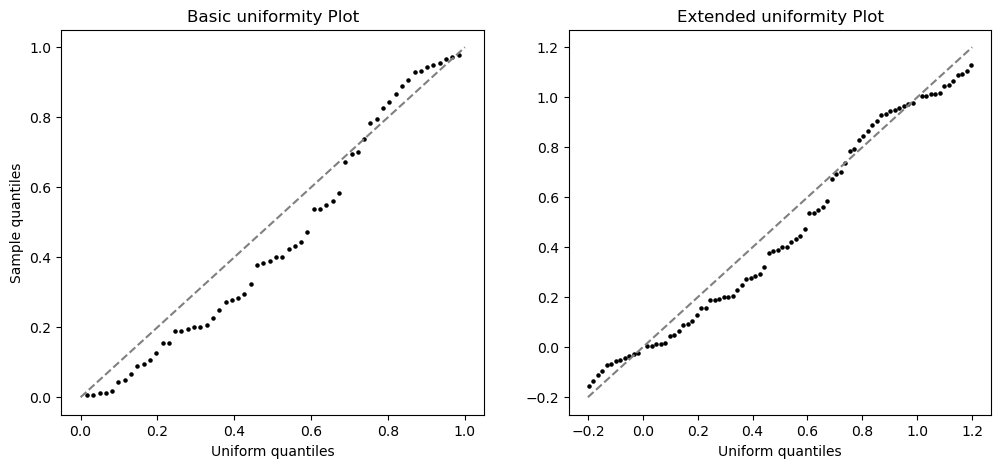

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].scatter(x, γ, s=5, color='black')
ax[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
ax[0].set_title('Basic uniformity Plot')
ax[0].set_ylabel('Sample quantiles')
ax[0].set_xlabel('Uniform quantiles')


ax[1].scatter(x_extend, γ_extend, s=5, color='black')
ax[1].plot([-0.2, 1.2], [-0.2, 1.2], linestyle='--', color='gray')
ax[1].set_title('Extended uniformity Plot')
ax[1].set_xlabel('Uniform quantiles')



### Figure 4.12

In [16]:
d_fisher_b6 = load_data('B6','fisher')

c_fisher_b6_s0 = Circular(np.sort(d_fisher_b6[d_fisher_b6.set==2]['θ'].values[:10]))
c_fisher_b6_s1 = Circular(np.sort(d_fisher_b6[d_fisher_b6.set==2]['θ'].values[:20]), kwargs_median={'method': 'deviation'})
c_fisher_b6_s2 = Circular(np.sort(d_fisher_b6[d_fisher_b6.set==2]['θ'].values))

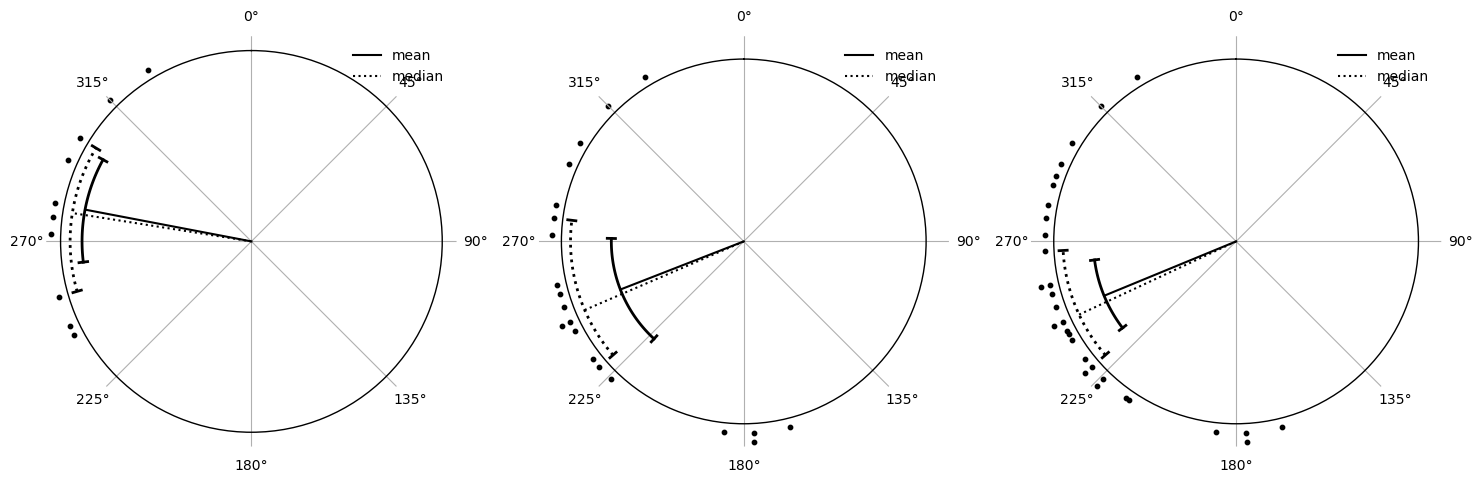

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6),subplot_kw=dict(projection='polar'))
c_fisher_b6_s0.plot(ax[0],
    plot_rose=False, plot_mean=True, plot_median=True, plot_density=False,)
c_fisher_b6_s1.plot(ax[1],
    plot_rose=False, plot_mean=True, plot_median=True, plot_density=False,)
c_fisher_b6_s2.plot(ax[2],
    plot_rose=False, plot_mean=True, plot_median=True, plot_density=False,)

### Figure 4.4 and 4.13

In [18]:
d_fisher_b7 = load_data('B7','fisher')['θ'].values
c_fisher_b7 = Circular(d_fisher_b7)


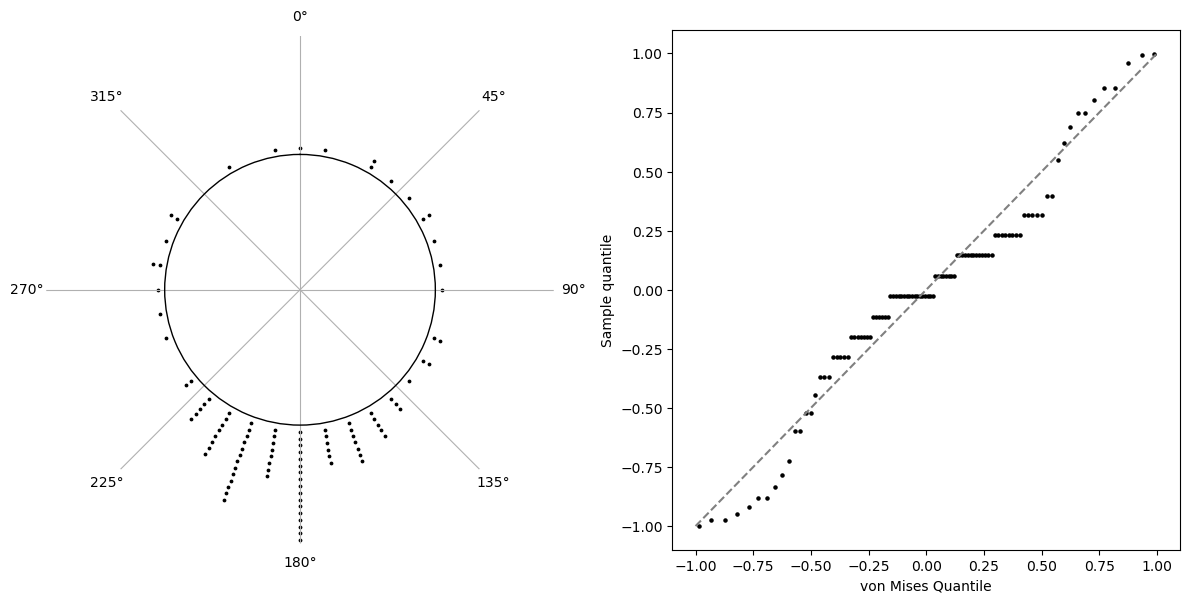

In [19]:
from scipy.stats import probplot
fig = plt.figure(figsize=(12, 6))
ax0 = fig.add_subplot(121, polar=True)
c_fisher_b7.plot(
    plot_rose=False, plot_mean=False, plot_median=False, plot_density=False,
    marker_size=3,
    ax=ax0) 

ax1 = fig.add_subplot(122, polar=False)

z = np.sort(np.sin(0.5 * (c_fisher_b7.alpha - c_fisher_b7.mean)))
q, z = probplot(z, dist='vonmises', sparams=(c_fisher_b7.kappa))[0]
ax1.scatter(np.sin(0.5 * q), z, color='black', s=5)
ax1.plot([-1, 1], [-1,1], ls='--', color='gray')
ax1.set_xlabel('von Mises Quantile')
ax1.set_ylabel('Sample quantile')


fig.tight_layout()



In [20]:
%load_ext watermark
%watermark --time --date --timezone --updated --python --iversions --watermark -p pycircstat2

Last updated: 2023-01-20 15:18:08CET

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

pycircstat2: 0.1.0

numpy     : 1.23.5
matplotlib: 3.5.3
sys       : 3.10.6 | packaged by conda-forge | (main, Aug 22 2022, 20:43:44) [Clang 13.0.1 ]

Watermark: 2.3.1

